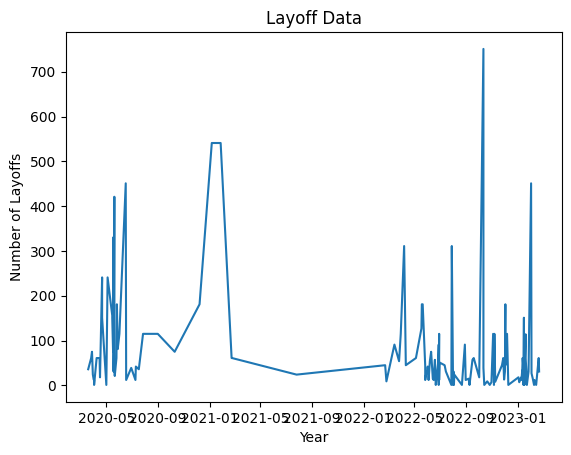

c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is availab

RMSE: 121.39


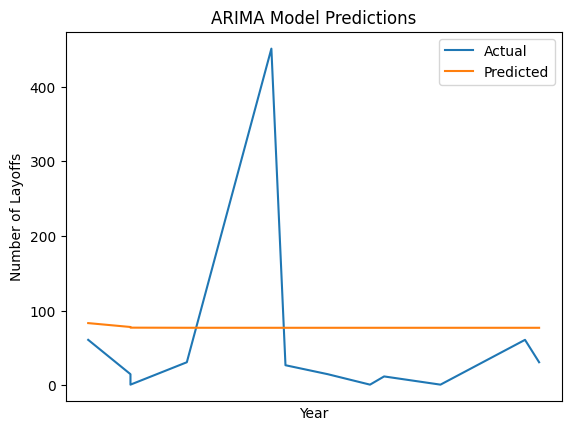

c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


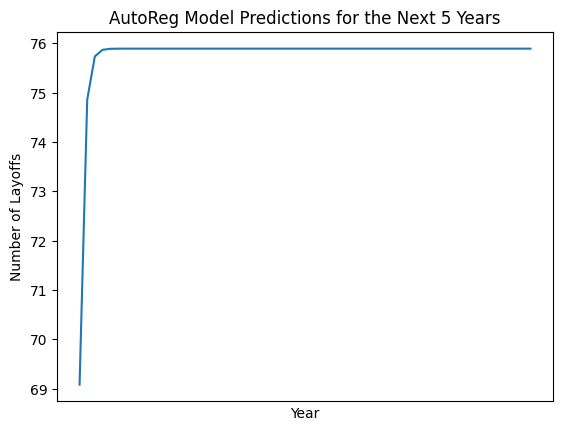

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('webDev5.csv', index_col='date', parse_dates=True)

# Plot the dataset
plt.plot(df)
plt.title('Layoff Data')
plt.xlabel('Year')
plt.ylabel('Number of Layoffs')
plt.show()

# Split the dataset into training and test sets
train = df[:-12]
test = df[-12:]

# Fit an ARIMA model to the training set
model = ARIMA(train, order=(1, 0, 0))
model_fit = model.fit()

# Make predictions for the test set using the fitted ARIMA model
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate the performance of the ARIMA model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE: %.2f' % rmse)

# Plot the predictions and the actual values of the test set
fig, ax = plt.subplots()
ax.plot(test.index, test.values, label='Actual')
ax.plot(test.index, predictions, label='Predicted')
ax.set_title('ARIMA Model Predictions')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Layoffs')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Fit an AutoReg model to the entire dataset
model_final = AutoReg(df['laid_off'], lags=1)
model_fit_final = model_final.fit()

# Make predictions for the next 5 years
predictions_final = model_fit_final.predict(start=len(df), end=len(df)+59, dynamic=False)

# Plot the predictions for the next 5 years
fig, ax = plt.subplots()
ax.plot(predictions_final)
ax.set_title('AutoReg Model Predictions for the Next 5 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Layoffs')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()
